# **Analysis report on Mosquito Count & West Nile Virus in the City of Chicago, Illinois**

#### **Author:** Kartik

#### **Contact:** kkakar664@gmail.com

#### **Date:** Oct 4, 2023

## Table of Contents
---
1. [Introduction](#introduction)
2. [Key Questions](#keyquestions)
3. [Assumptions & Limitations](#assumptions)
4. [Methods](#methods)
5. [Findings & Analysis](#findings)
- [Part 1 - Basic Analysis](#part1)
- [Part 2 - Statistical Analysis](#part2)
- [Part 3 - Advanced Statistical Analysis](#part3)

## Introduction <a class="anchor" id="introduction"></a>
---
This business report provides an in-depth analysis of the mosquito data collected in the City of Chicago, Illinois. The dataset comprises of important information like the number of mosquitos captured, the presence of West Nile Virus (WNV), the type of trap used to capture them, and the precise time and location of each mosquito catch. The primary objective of this analysis is to explore the intricate connections between various variables and the mosquito population while also examining the likelihood of encountering WNV at specific times and locations.


## Key Questions <a class="anchor" id="keyquestions"></a>
---
1. How do various factors relate to the mosquito population?
2. What's the likelihood of detecting West Nile Virus (WNV) in a specific place and time?
3. Are there significant differences in the occurrence of WNV among various mosquito species?
4. Which variables exhibit positive or negative correlations with the number of captured mosquitoes?
5. What is the influence of the independent variables on both mosquito capture rates and the presence of West Nile Virus?


## Assumptions and Limitations <a class="anchor" id="assumptions"></a>
---
#### Assumptions
This analysis relies on the accuracy of the provided data and assumes that this data accurately represents the broader mosquito population in the city. It also operates on the assumption that there is a linear relationship between the independent variables and the dependent variables in the regression models used.

#### Limitations
However, it's important to acknowledge certain limitations as well. Firstly, the actual relationship between the variables may not strictly adhere to linearity, which might require further exploration. Additionally, the models used may be affected by omitted variable bias, meaning that other important factors influencing mosquito capture rates and the presence of WNV may not have been considered in the models. These limitations highlight the importance of interpreting the results with caution and suggest potential areas for future research.

## Methods <a class="anchor" id="methods"></a>
--- 
The analysis involves several stages, including :
- basic data manipulation 
- statistical analysis 
- advanced statistical techniques such as linear and logistic regression.

The initial dataset was obtained from the city of Chicago, Illinois, and underwent a cleaning process for analysis. Categorical variables were converted into dummy variables, and the 'WNV Present' column was transformed into a binary format. Additionally, monthly average mosquito counts were calculated and presented. A chi-square test was used to determine if there is a significant difference in WNV occurrence among different mosquito species. Correlation coefficients were computed to identify variables that have either positive or negative associations with the number of captured mosquitoes. Finally, both linear and logistic regression models were applied to assess how independent variables affect mosquito capture counts and the presence of WNV, respectively.

#### Data Loading

The preliminary configuration of the environment is established beforehand, laying the foundation for exploratory data analysis conducted in the following sections.

In [736]:
# If the libraries are not preinstalled, please uncomment the following and install as needed:
# pip install numpy
# pip install pandas
# pip install matplotlib
# pip install seaborn
# pip install scipy
# pip install statsmodels


# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [737]:
# So we don't have to write 'print' everytime we want to display the output.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [738]:
# Load the dataset from the "mosquito_data_part_2.csv" file.
df = pd.read_csv('mosquito_data_part_2.csv')

# Display the first 5  rows of the dataframe (df) to get an overvie of the provided data. 
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 0:09,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 0:09,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 0:09,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 0:09,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 0:09,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


#### Data Dictionary: 

- **Year:** Year that the WNV test is performed.
- **Week:** Week that the WNV test is performed.
- **Address Block:** Address of the location of trap.
- **Trap:** Id of the trap
- **Trap type:** Type of trap
- **Date:** Date and time that the WNV test is performed
- **Mosquito number:** Number of mosquitoes caught in this trap
- **WNV Present:** Whether West Nile Virus was present in these mosquitos
- **Species:** Mosquito species
- **Lat:** Latitude of trap
- **Lon:** Longitude of trap
- **Month:** Month that the WNV test is performed.

In [739]:
# Display the last 5 rows of the dataframe to get an overview of the data
df.tail()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 0:09,4,positive,CULEX PIPIENS,41.857843,-87.635858,9
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 0:08,19,positive,CULEX PIPIENS,41.965376,-87.758403,8
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 0:07,34,positive,CULEX RESTUANS,41.662395,-87.590176,7
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 0:08,50,positive,CULEX RESTUANS,41.919197,-87.664758,8
18494,2015,33,100XX W OHARE AIRPORT,T902,GRAVID,2015-08-20 0:08,6,positive,CULEX RESTUANS,41.977738,-87.880969,8


In [740]:
# Randomly sample 15 rows from the dataframe
df.sample(15)

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
5293,2014,39,58XX N RIDGE AVE,T231,GRAVID,2014-09-25 0:09,5,negative,CULEX PIPIENS,41.987881,-87.666785,9
11682,2009,38,67XX S KEDZIE AVE,T066,GRAVID,2009-09-25 0:09,2,negative,CULEX PIPIENS,41.771199,-87.703107,9
11337,2010,27,3XX W 104TH ST,T095,GRAVID,2010-07-13 0:07,4,negative,CULEX PIPIENS,41.705328,-87.632955,7
17553,2016,36,100XX W OHARE AIRPORT,T913,GRAVID,2016-09-08 0:09,20,positive,CULEX RESTUANS,41.977738,-87.880969,9
7696,2013,29,58XX N PULASKI RD,T027,GRAVID,2013-07-19 0:07,50,negative,CULEX RESTUANS,41.986320,-87.728378,7
5761,2014,34,39XX S ASHLAND AVE,T074,GRAVID,2014-08-21 0:08,4,negative,CULEX PIPIENS,41.820859,-87.665108,8
16049,2017,31,101XX S STONY ISLAND AVE,T138B,SENTINEL,2017-08-03 0:08,41,positive,CULEX RESTUANS,41.710831,-87.584517,8
17901,2014,38,51XX N MONT CLARE AVE,T223,GRAVID,2014-09-18 0:09,16,positive,CULEX PIPIENS,41.974525,-87.804586,9
17511,2016,34,100XX W OHARE AIRPORT,T911,GRAVID,2016-08-25 0:08,8,positive,CULEX RESTUANS,41.977738,-87.880969,8
1457,2018,31,101XX S STONY ISLAND AVE,T138B,SENTINEL,2018-08-02 0:08,23,negative,CULEX RESTUANS,41.710829,-87.584526,8


Did this to quickly check if the data is loaded correctly. 

## Findings & Analysis <a class="anchor" id="findings"></a>
--- 
This dataset consists of mosquito tracking data spanning almost a decade from 2008 to 2019. The findings and analysis are divided into three parts:

##### **1. Basic analysis**

##### **2. Statistical analysis**

##### **3. Advanced statistical analysis**

In [741]:
# Get information about the dataframe including column names, datatypes, and non-null values. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


As we can see, this function offers a concise summary of the dataframe, providing valuable insights from the output.

There are **18495 rows** and **12 columns** in the dataset.

In [742]:
# Another way of checking for any null values
df.isna().sum()

Year               0
Week               0
Address Block      0
Trap               0
Trap type          0
Date               0
Mosquito number    0
WNV Present        0
Species            0
Lat                0
Lon                0
Month              0
dtype: int64

##### Based on this summary: 

1. The dataframe comprises **18,495** entries, indicating the number of rows.
2. There are **12** columns present in the dataframe.
3. The column names include ***'Year', 'Week', 'Address Block', 'Trap', 'Trap type', 'Date', 'Mosquito number', 'WNV Present', 'Species', 'Lat', 'Lon', and 'Month'***.
4. All columns contain 18,495 non-null entries, implying that **no missing values** are present in the dataset.
5. The data types of the columns are as follows:
    - **int64**: 'Year', 'Week', 'Mosquito number' and 'Month'.
    - **float64**: 'Lat' and 'Lon'.
    - **Object (string)**: 'Address Block', 'Trap', 'Trap type', 'Date', 'WNV Present', and 'Species'. 
6. The dataframe consumes approximately **1.7+ MB** of memory.

This information is highly valuable for comprehending the data's structure, facilitating subsequent data analysis decisions. For instance, understanding the data types of columns aids in selecting appropriate statistical methods. The absence of missing values eliminates the need for handling such data concerns.

In [743]:
# Check for duplicate rows
df.duplicated().sum()

658

In [744]:
# Display the duplicated rows:
df.loc[df.duplicated(), :].sort_values("Date")

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
17486,2007,28,4XX W 127TH,T135,CDC,2007-08-01 2:08,10,positive,CULEX PIPIENS,41.664336,-87.631956,8
17613,2007,28,4XX W 127TH,T135,CDC,2007-08-01 2:08,10,positive,CULEX PIPIENS,41.664336,-87.631956,8
17733,2007,28,4XX W 127TH,T135,CDC,2007-08-01 2:08,10,positive,CULEX PIPIENS,41.664336,-87.631956,8
18071,2007,31,65XX N OAK PARK AVE,T143,GRAVID,2007-08-07 0:08,29,positive,CULEX PIPIENS,41.999263,-87.795545,8
15885,2007,31,65XX N OAK PARK AVE,T143,GRAVID,2007-08-07 0:08,29,positive,CULEX PIPIENS,41.999263,-87.795545,8
...,...,...,...,...,...,...,...,...,...,...,...,...
17397,2019,33,100XX W OHARE AIRPORT,T913,GRAVID,2019-08-15 0:08,15,positive,CULEX RESTUANS,41.977738,-87.880969,8
15760,2019,34,100XX W OHARE AIRPORT,T901,GRAVID,2019-08-22 0:08,16,positive,CULEX RESTUANS,41.977738,-87.880969,8
18239,2019,34,100XX W OHARE AIRPORT,T901,GRAVID,2019-08-22 0:08,16,positive,CULEX RESTUANS,41.977738,-87.880969,8
17206,2019,35,100XX W OHARE AIRPORT,T913,GRAVID,2019-08-29 0:08,3,positive,CULEX RESTUANS,41.977738,-87.880969,8


With the above two functions, we can see that there are **658 duplicated rows** in our dataframe. The decision of whether to remove these duplicate rows depends on the context and the characteristics of the data. Given the nature of the data, which pertains to mosquito catches, the duplicate entries may be legitimate and meaningful. For instance, it is plausible to have duplicate rows when the same mosquito species is captured in the same trap on the same date. Hence, without additional insights or specific criteria, it may **not** be advisable to drop these duplicate records from the dataset.

## Part 1 - Basic Analysis <a class="anchor" id="part1"></a>
---
### 1.1) Convert the WNV Present column into a binary column and create dummy variables from the Trap type column.

In [745]:
# Check the disctinct items in 'WNV Present' column. 
df['WNV Present'].value_counts()

WNV Present
negative    14501
positive     3994
Name: count, dtype: int64

This means that there are only two distinct values 'positive' and 'negative' in this columns with 3994 and 14501 value counts respectively. 

In [746]:
# Convert 'WNV Present' column into a binary column. 
df['WNV Present Binary'] = df['WNV Present'].map({'positive': 1, 'negative': 0})

# Print of the dataframe to check for the binary column
df

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,WNV Present Binary
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 0:09,2,negative,CULEX RESTUANS,41.977738,-87.880969,9,0
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 0:09,1,negative,CULEX RESTUANS,41.798211,-87.736925,9,0
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 0:09,2,negative,CULEX RESTUANS,41.987245,-87.689417,9,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 0:09,1,negative,CULEX RESTUANS,41.953664,-87.724987,9,0
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 0:09,9,negative,CULEX RESTUANS,41.657069,-87.546049,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 0:09,4,positive,CULEX PIPIENS,41.857843,-87.635858,9,1
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 0:08,19,positive,CULEX PIPIENS,41.965376,-87.758403,8,1
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 0:07,34,positive,CULEX RESTUANS,41.662395,-87.590176,7,1
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 0:08,50,positive,CULEX RESTUANS,41.919197,-87.664758,8,1


##### Convert 'WNV Present' column into a binary column: 
This is done by mapping the 'positive' and 'negative' values in the 'WNV Present' column to 1 and 0 respectively. After running the code above, the 'WNV Present' column has been successfully converted into a binary column called 'WNV Present Binary', with 'positive' mapped to 1 and 'negative' mapped to 0.

In [747]:
# Check the disctinct items in 'Trap type' column. 
df['Trap type'].value_counts()

Trap type
GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: count, dtype: int64

In [748]:
# Create dummy variables from the 'Trap type' column. 
pd.get_dummies(df['Trap type'], dtype = int)

,CDC,GRAVID,OVI,SENTINEL
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
18490,0,1,0,0
18491,0,1,0,0
18492,0,1,0,0
18493,0,0,0,1


##### Create dummy variables from the 'Trap type' column: 
This involves generating additional columns for every unique value found in the 'Trap type' column. Each of these new columns, also called dummy variables, will have a value of 1 if the original 'Trap type' matches the specific trap type associated with that column, and 0 if it doesn't. After executing the provided code, four new columns have been introduced: 'CDC,' 'GRAVID,' 'OVI,' and 'SENTINEL.'


---

### 1.2) What is the average number of mosquitoes for each month? What trends do you notice?

In [749]:
# First, we will add a new field called "day".
df['day'] = pd.to_datetime(df['Date']).dt.day

# Sanity check
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,WNV Present Binary,day
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 0:09,2,negative,CULEX RESTUANS,41.977738,-87.880969,9,0,26
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 0:09,1,negative,CULEX RESTUANS,41.798211,-87.736925,9,0,26
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 0:09,2,negative,CULEX RESTUANS,41.987245,-87.689417,9,0,26
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 0:09,1,negative,CULEX RESTUANS,41.953664,-87.724987,9,0,26
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 0:09,9,negative,CULEX RESTUANS,41.657069,-87.546049,9,0,26


In [750]:
# Then we will find total number of mosquitos per day per month.
mosquito_per_day = df[['Month', 'day', 'Mosquito number']].groupby(['Month', 'day']).sum()

# Check
mosquito_per_day

Mosquito number
Month day                 
5     28                86
      29                30
6     2                332
      3                 83
      4                250
...                    ...
9     30               152
10    1                112
      2                174
      4                724
      9                200

[122 rows x 1 columns]

In [751]:
# Average mosquito number per month
monthly_avg = mosquito_per_day.groupby('Month').mean()

# Check
monthly_avg

,Mosquito number
Month,
5,58.000000
6,1059.518519
7,2034.724138
8,2684.806452
9,1001.896552
10,302.500000


#### Interpretation:

1. **df['day'] = pd.to_datetime(df['Date']).dt.day:** This line adds a new column called 'day' to the DataFrame 'df'. Converting the 'Date' column into a datetime format, 'dt.day' effectively extracts the day of the month for each date in the 'Date' column. 
2. **df.head():** Then we do a sanity check to see if the column is added properly. 
3. **mosquito_per_day = df[['Month', 'day', 'Mosquito number']].groupby(['Month', 'day']).sum():** This code groups the DataFrame 'df' by 'Month' and 'day' and calculates the total mosquito count for each unique combination of these two columns, storing the result in the 'mosquito_per_day' DataFrame.
4. **monthly_avg = mosquito_per_day.groupby('Month').mean():** This line is grouping the answer from previous code by "Month", and applies mean function to it. 

From the output of the code, we can see the average number of mosquitoes for each month:

- **May:** Approximately 58 mosquitoes
- **June:** Approximately 1,059.52 mosquitoes
- **July:** Approximately 2,034.72 mosquitoes
- **August:** Approximately 2,684.81 mosquitoes
- **September:** Approximately 1,001.90 mosquitoes
- **October:** Approximately 302.50 mosquitoes

These values represent the average number of mosquitoes caught per trap for each month.

**August** has the highest average mosquito count, while **May** has the lowest. Following the peak in August, mosquito averages gradually decline in September and October.

---

##### Now, we will plot the output for above code to visualize any trends:

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Month', ylabel='Mosquito number'>

Text(0.5, 1.0, 'Average Number of Mosquitoes per Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Average Number of Mosquitoes')

Text(5, 58.0, '58.00')

Text(6, 1059.5185185185185, '1059.52')

Text(7, 2034.7241379310344, '2034.72')

Text(8, 2684.8064516129034, '2684.81')

Text(9, 1001.8965517241379, '1001.90')

Text(10, 302.5, '302.50')

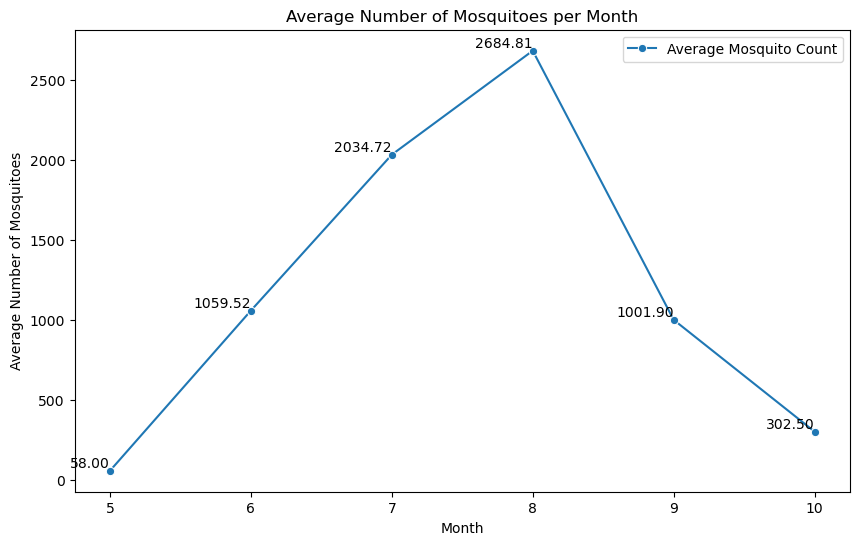

In [752]:
# Plotting the average number of mosquitoes for each month
plt.figure(figsize = (10, 6))
sns.lineplot(data = monthly_avg, x= 'Month', y='Mosquito number', marker='o', label='Average Mosquito Count')
plt.title('Average Number of Mosquitoes per Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Mosquitoes')
for x, y in zip(monthly_avg.index, monthly_avg['Mosquito number']):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')
plt.legend()
plt.show()

#### Interpretetion

The is a line plot illustrating the **average monthly mosquito counts**. The x-axis represents the months, and the y-axis represents the average mosquito numbers.

From the graph, we can deduce the following:

- The average mosquito population tends to rise from May to its highest point in August.
- Following the peak in August, mosquito numbers begin to decline, reaching a minimum in October.
- This pattern could be linked to mosquito life cycles and breeding behaviors. Typically, warmer weather in July and August promotes mosquito breeding, whereas cooler fall weather reduces mosquito activity.

---
## Part 2 - Statistical Analysis <a class="anchor" id="part2"></a>
---

### 2.1)  Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?

For a Chi-Squared test for independence, our hypotheses are:

**Null Hypothesis ($H_0$):** There is no statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus.

**Alternative Hypothesis ($H_1$):** There is a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus.

𝐻0 states the occurrence of WNV is independent of the mosquito species, while the 𝐻1 states the occurrence of WNV is not independent of the mosquito species.

In [753]:
# Print of the dataframe to see what we are working with:
df

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,WNV Present Binary,day
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 0:09,2,negative,CULEX RESTUANS,41.977738,-87.880969,9,0,26
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 0:09,1,negative,CULEX RESTUANS,41.798211,-87.736925,9,0,26
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 0:09,2,negative,CULEX RESTUANS,41.987245,-87.689417,9,0,26
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 0:09,1,negative,CULEX RESTUANS,41.953664,-87.724987,9,0,26
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 0:09,9,negative,CULEX RESTUANS,41.657069,-87.546049,9,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 0:09,4,positive,CULEX PIPIENS,41.857843,-87.635858,9,1,9
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 0:08,19,positive,CULEX PIPIENS,41.965376,-87.758403,8,1,24
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 0:07,34,positive,CULEX RESTUANS,41.662395,-87.590176,7,1,27
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 0:08,50,positive,CULEX RESTUANS,41.919197,-87.664758,8,1,17


In [754]:
# Use indexing to grab only the columns of interest
df_int = df[['Species', 'WNV Present Binary']]

df_int

,Species,WNV Present Binary
0,CULEX RESTUANS,0
1,CULEX RESTUANS,0
2,CULEX RESTUANS,0
3,CULEX RESTUANS,0
4,CULEX RESTUANS,0
...,...,...
18490,CULEX PIPIENS,1
18491,CULEX PIPIENS,1
18492,CULEX RESTUANS,1
18493,CULEX RESTUANS,1


In [755]:
# Create a contingency table (unstacked)
contingency_table = df.groupby('Species')['WNV Present Binary'].value_counts().unstack()

contingency_table

WNV Present Binary,0,1
Species,,
CULEX PIPIENS,4074,1412
CULEX RESTUANS,9309,2557
CULEX SALINARIUS,215,11
CULEX TERRITANS,903,14


In [756]:
# Perform the chi-squared test
t_statistic, p_value, dof, expected_freq = stats.chi2_contingency(contingency_table)

# Print the results
print(f'Chi-square statistic: {t_statistic}')
print(f'p-value: {p_value}')

Chi-square statistic: 311.10394683130164
p-value: 3.9302341764409087e-67


#### Interpretation:

The codes above perform a chi-squared test of independence to determine if there is a statistical significant association between the mosquito species and the occurrence of West Nile Virus (WNV).

Here's a breakdown of the codes and the results:

1. **df_int = df[['Species', 'WNV Present Binary']]:** 
This line uses indexing to grab only the columns of interest, 'Species' and 'WNV Present Binary', from the DataFrame.
2. **contingency_table = df.groupby('Species')['WNV Present Binary'].value_counts().unstack():**
This line creates a contingency table using the groupby() and unstack() functions. The groupby() function groups the DataFrame by the 'Species' column, and the value_counts() function counts the number of occurrences of each value of 'WNV Present Binary' for each species. The unstack() function reshapes the resulting Series into a DataFrame, where each row represents a species and each column represents a value of 'WNV Present Binary'.
3. **t-statistic, p_value, dof, expected_freq = stats.chi2_contingency(contingency_table):** 
This line performs the chi-squared test using the contingency table. The chi2_contingency() function returns four values:
    - **t-statistic:** The Chi-squared test statistic.
    - **p_value:** The p-value of the test.
    - **dof:** The degrees of freedom.
    - **expected_freq:** The expected frequencies, based on the marginal sums of the table.
4. **print(f'Chi-square statistic: {t-statistic}'), and print(f'p-value: {p_value}'):** 
These lines print the results of the chi-squared test.

From the output, we can see that the chi-squared statistic is approximately 311.10, the p-value is approximately 3.93e-67, and the degrees of freedom is 3.

**Given the extremely small p-value (much less than 0.05), we would reject the null hypothesis $H_0$ and conclude that there is a statistically significant association between the mosquito species and the occurrence of WNV. This means that the occurrence of WNV is not independent of the mosquito species.**

---
### 2.2)  Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

In [757]:
# Create dummy variables from the 'Trap type' column
dummy_variables = pd.get_dummies(df['Trap type'], dtype = int)

# Concatenate the original dataframe and dummy variables 
df2 = pd.concat([df, dummy_variables], axis=1)

# Check the new dataframe 
df2 

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,WNV Present Binary,day,CDC,GRAVID,OVI,SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 0:09,2,negative,CULEX RESTUANS,41.977738,-87.880969,9,0,26,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 0:09,1,negative,CULEX RESTUANS,41.798211,-87.736925,9,0,26,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 0:09,2,negative,CULEX RESTUANS,41.987245,-87.689417,9,0,26,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 0:09,1,negative,CULEX RESTUANS,41.953664,-87.724987,9,0,26,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 0:09,9,negative,CULEX RESTUANS,41.657069,-87.546049,9,0,26,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 0:09,4,positive,CULEX PIPIENS,41.857843,-87.635858,9,1,9,0,1,0,0
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 0:08,19,positive,CULEX PIPIENS,41.965376,-87.758403,8,1,24,0,1,0,0
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 0:07,34,positive,CULEX RESTUANS,41.662395,-87.590176,7,1,27,0,1,0,0
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 0:08,50,positive,CULEX RESTUANS,41.919197,-87.664758,8,1,17,0,0,0,1


In [758]:
# Select numerical columns
numerical_columns = ['Year', 'Week', 'Mosquito number', 'Lat', 'Lon', 'Month', 'WNV Present Binary', 'CDC', 'GRAVID', 'OVI', 'SENTINEL']

# Calculate correlation coefficients with 'Mosquito number'
correlations = df2[numerical_columns].corr()['Mosquito number'].drop('Mosquito number').sort_values()

# Show correlation coefficients with 'Mosquito number'
correlations

Lon                  -0.151421
GRAVID               -0.138275
Month                -0.040426
Week                 -0.033900
OVI                  -0.005392
CDC                   0.094147
Lat                   0.096820
SENTINEL              0.108575
Year                  0.129326
WNV Present Binary    0.408034
Name: Mosquito number, dtype: float64

#### Interpretation:

The codes above calculate the correlation coefficients between the 'Mosquito number' column and all other numerical columns in the dataframe. The correlation coefficient is a statistical measure that calculates the strength of the relationship between the relative movements of two variables. The values range between -1.0 and 1.0. A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation. A correlation of 0.0 shows no linear relationship between the movement of the two variables.

Here are the correlation coefficients:

- **'Lon':** -0.151421
- **'GRAVID':** -0.138275
- **'Month':** -0.0404264
- **'Week':** -0.0338996
- **'OVI':** -0.00539161
- **'CDC':** 0.094147
- **'Lat':** 0.0968199
- **'SENTINEL':** 0.108575
- **'Year':** 0.129326
- **'WNV Present Binary':** 0.408034

From these results, we can see that:

- The **'Lon' (longitude), 'GRAVID', 'Month', 'Week', and 'OVI'** columns are negatively correlated with the 'Mosquito number' column. This means that as these variables increase, the number of mosquitoes tends to decrease.
- The **'CDC', 'Lat' (latitude), 'SENTINEL', 'Year', and 'WNV Present Binary'** columns are positively correlated with the 'Mosquito number' column. This means that as these variables increase, the number of mosquitoes tends to increase.
- The **'WNV Present Binary'** column has the highest positive correlation with the 'Mosquito number' column, indicating that the presence of West Nile Virus is associated with a higher number of mosquitoes.
- The **'Lon'** column has the highest negative correlation with the 'Mosquito number' column, indicating that locations with higher longitude values tend to have fewer mosquitoes.

<Figure size 1400x1400 with 0 Axes>

<Axes: >

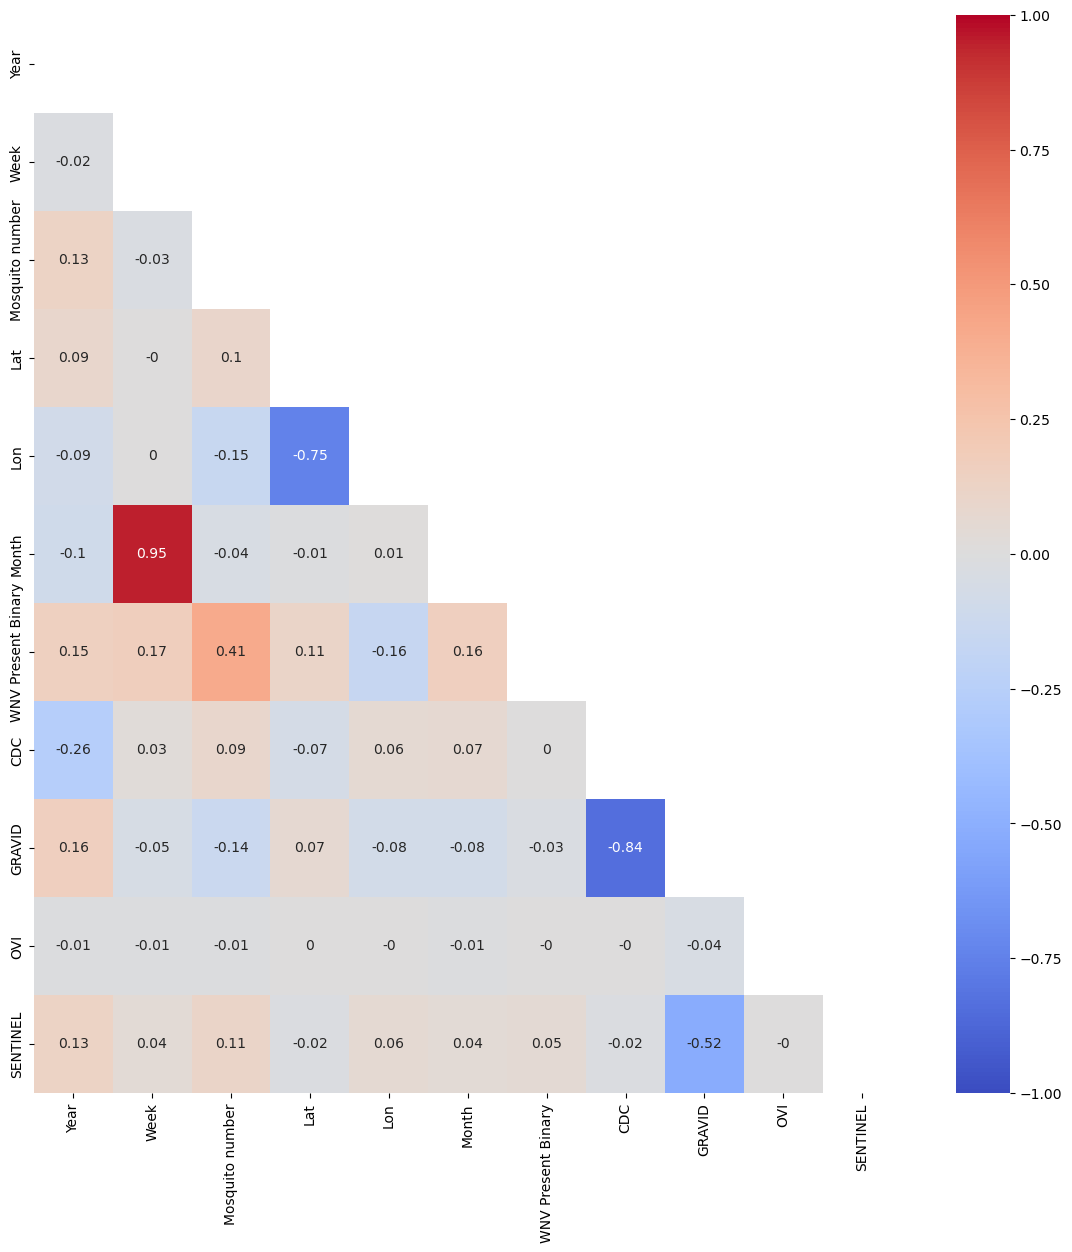

In [759]:
# Mask for upper-triangular
mask = np.triu(df2[numerical_columns].corr())

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(14,14))
sns.heatmap(df2[numerical_columns].corr().round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

#### Interpretation:

The heatmap visually represents the correlation matrix for the numerical columns in the dataset. Each cell's colour in the heatmap reflects the strength and direction of the correlation, with darker colours indicating a stronger correlation and lighter ones representing weaker correlation. Positive correlations are depicted with warm colours like red, while negative correlations are shown with cool colors like blue. The numbers within each cell represent the correlation coefficients, ranging from -1 to 1.

From both the heatmap and the printed correlation coefficients, we can make the following observations:

- **'Lon' (Longitude)** has a negative correlation of -0.151 with 'Mosquito number'. This means that as the longitude increases, there tends to be a decrease in the number of mosquitoes, and vice versa.

- **'GRAVID' (type of trap)** has a negative correlation of about -0.138 with 'Mosquito number'. This implies that this particular trap type is associated with a lower mosquito count.

- **'Month'** and **'Week'** have slight negative correlations with 'Mosquito number', indicating a small decrease in mosquito numbers later in the year and in the week.

- **'OVI' (type of trap)** has a very weak negative correlation with 'Mosquito number', suggesting a minimal association between this trap type and mosquito counts.

- **'CDC' (type of trap)** has a positive correlation of approximately 0.094 with 'Mosquito number'. This indicates that this specific trap type is linked to a higher mosquito count.

- **'Lat' (Latitude)** has a positive correlation of roughly 0.097 with 'Mosquito number'. This means that as the latitude increases, there tends to be an increase in mosquito numbers, and vice versa.

- **'SENTINEL' (type of trap)** has a positive correlation of about 0.109 with 'Mosquito number', implying that this trap type is associated with a higher mosquito count.

- **'Year'** has a positive correlation of approximately 0.129 with 'Mosquito number,' suggesting that the number of mosquitoes tends to increase with each passing year.

---

To determine if these correlations are statistically significant, we can perform a hypothesis test for each correlation: 

$H_0$: **There is no correlation between the variables and the number of mosquitoes caught.**

$H_1$: **There is a correlation between the variables and the number of mosquitoes caught.**

The null hypothesis $H_0$ states the correlation coefficient (rho) is 0, while the alternative hypothesis $H_1$ states the correlation coefficient (rho) is not 0.

If the p-value from the test is less than 0.05, we reject the null hypothesis and conclude that the correlation is statistically significant.

However, please note that correlation does not imply causation. Even if a correlation is statistically significant, it does not necessarily mean that one variable causes the other to change.

In [760]:
# Initialize an empty dictionary to store the p-values
pvalues = {}

# Calculate the p-values for each numerical column
for column in numerical_columns:
    if column != 'Mosquito number':
        variables, pvalue = stats.pearsonr(df2['Mosquito number'], df2[column])
        pvalues[column] = pvalue
    
# Create a dataframe for the correlations and p-values
correlations2 = pd.DataFrame({'correlation': correlations, 'p value': pvalues})

# Show the dataframe for the correlations and p-values
correlations2

,correlation,p value
CDC,0.094147,1.095257e-37
GRAVID,-0.138275,1.267816e-79
Lat,0.096820,9.096837e-40
Lon,-0.151421,2.765607e-95
Month,-0.040426,3.803876e-08
OVI,-0.005392,4.634395e-01
SENTINEL,0.108575,1.289396e-49
WNV Present Binary,0.408034,0.000000e+00
Week,-0.033900,4.002825e-06
Year,0.129326,8.393050e-70


#### Interpretation:

The codes above calculate the p-values for the correlation between the 'Mosquito number' column and all other numerical columns in the DataFrame. The p-value is a statistical measure that helps us determine whether the observed correlation is statistically significant. If the p-value is less than a chosen significance level (commonly 0.05), we reject the null hypothesis and conclude that there is a statistically significant correlation.

Here are the p-values for each variable:

- **'CDC':** 1.09526e-37
- **'GRAVID':** 1.26782e-79
- **'Lat':** 9.09686e-40
- **'Lon':** 2.7656e-95
- **'Month':** 3.80388e-08
- **'OVI':** 0.463439
- **'SENTINEL':** 1.2894e-49
- **'WNV Present Binary':** 0
- **'Week':** 4.00282e-06
- **'Year':** 8.39305e-70

From these results, we can see that:

- **All variables except 'OVI'** have a p-value less than 0.05, which means that **we can reject the null hypothesis for these variables**. The correlations between these variables and the 'Mosquito number' column are statistically significant.
- The **'OVI'** variable has a p-value greater than 0.05, which means that **we cannot reject the null hypothesis for this variable**. There is not enough evidence to suggest a significant correlation between 'OVI' and the 'Mosquito number' column.

---
## Part 3 - Advanced Statistical Analysis <a class="anchor" id="part3"></a>
---

We know that binary columns are not apt and can't be used in our model, so we will make dummy variables for column **'Species'** (like for 'Trap type' previously done). These columns carry alot of information and will help us analyze the data much better. From now on we won't be using **'Address Block' and 'Trap'**, because they are string/mixed datatype and are not that essential for the dataset. 

In [761]:
# Finding distinct values and their counts in the 'Trap type' column.
df2['Trap type'].value_counts()

Trap type
GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: count, dtype: int64

**`Finding:`** As we can see that 'OVI' just had 1 case so we will drop it. Alsternatively, we could have asked the SME's if we could combine this trap type with one of the other.

In [762]:
# Drop column 'OVI'.
df2 = df2.drop(columns=['Trap type', 'OVI'])

# Sanity check
df2.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,WNV Present Binary,day,CDC,GRAVID,SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 0:09,2,negative,CULEX RESTUANS,41.977738,-87.880969,9,0,26,0,1,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 0:09,1,negative,CULEX RESTUANS,41.798211,-87.736925,9,0,26,0,1,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 0:09,2,negative,CULEX RESTUANS,41.987245,-87.689417,9,0,26,0,1,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 0:09,1,negative,CULEX RESTUANS,41.953664,-87.724987,9,0,26,0,1,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 0:09,9,negative,CULEX RESTUANS,41.657069,-87.546049,9,0,26,0,1,0


---

#### Dummy variables for 'Species' column

We will split the 'Species' column into 4 sub-columns: **'CULEX PIPIENS', 'CULEX RESTUANS', 'CULEX SALINARIUS' and 'CULEX TERRITANS'** where if there is one count of a specific species, that column would hold a value of **1**, otherwise **0**.  

In [763]:
dummy_variables_for_species = pd.get_dummies(df['Species'], dtype = int)
dummy_variables_for_species

,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
18490,1,0,0,0
18491,1,0,0,0
18492,0,1,0,0
18493,0,1,0,0


In [764]:
# Concatenate the original dataframe and dummy variables into a new dataframe called 'df3'.
df3 = pd.concat([df2, dummy_variables_for_species], axis=1)

# Check the new dataframe 
df3.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,WNV Present Binary,day,CDC,GRAVID,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 0:09,2,negative,CULEX RESTUANS,41.977738,-87.880969,9,0,26,0,1,0,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 0:09,1,negative,CULEX RESTUANS,41.798211,-87.736925,9,0,26,0,1,0,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 0:09,2,negative,CULEX RESTUANS,41.987245,-87.689417,9,0,26,0,1,0,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 0:09,1,negative,CULEX RESTUANS,41.953664,-87.724987,9,0,26,0,1,0,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 0:09,9,negative,CULEX RESTUANS,41.657069,-87.546049,9,0,26,0,1,0,0,1,0,0


In [765]:
# Getting the distinct values and their counts of 'Species' column. 
df['Species'].value_counts()

Species
CULEX RESTUANS      11866
CULEX PIPIENS        5486
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: count, dtype: int64

**Finding**

We will be making ***'CULEX PIPIENS'*** as our reference category so we will be dropping this column. This was chosen at random. We will also get rid of the ***'Species'*** column because it is of the type **object** and it can't be used in ou model. We have already made dummy variables which helped us extract the info out of this column in **integer datatype**. 

In [766]:
# Dropping two columns. 
df3 = df3.drop(columns = ['Species', 'CULEX PIPIENS'])

In [767]:
# Sanity check
df3.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Lat,Lon,Month,WNV Present Binary,day,CDC,GRAVID,SENTINEL,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 0:09,2,negative,41.977738,-87.880969,9,0,26,0,1,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 0:09,1,negative,41.798211,-87.736925,9,0,26,0,1,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 0:09,2,negative,41.987245,-87.689417,9,0,26,0,1,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 0:09,1,negative,41.953664,-87.724987,9,0,26,0,1,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 0:09,9,negative,41.657069,-87.546049,9,0,26,0,1,0,1,0,0


---

### 3.1)  Run a linear regression to determine how the independent variables affect the number of mosquitoes caught. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. 

##### DataFrame 'df3' is our cleaned dataset, we will make another copy of this so we don't lose the original. 

In [768]:
# Making a copy of our dataframe, named 'stat_df'.
stat_df = df3.copy()

We will drop the **'WNV Present'** column because holds 'object' values. It had already previously been converted to a Binary column, so we can safely drop this one. 

In [769]:
# Dropping 'WNV Present' column. 
stat_df = df3.drop(columns = ['WNV Present'])

In [770]:
# Check to see if the drop worked. 
stat_df.head(1)

,Year,Week,Address Block,Trap,Date,Mosquito number,Lat,Lon,Month,WNV Present Binary,day,CDC,GRAVID,SENTINEL,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 0:09,2,41.977738,-87.880969,9,0,26,0,1,0,1,0,0


---

In [771]:
# Select numerical columns
numerical_columns = ['Year', 'Week', 'Mosquito number', 'Lat', 'Lon', 'Month', 'CDC', 'GRAVID', 'SENTINEL', 'day', 'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TERRITANS']

In [772]:
# Correlation between variables.
stat_df[numerical_columns].corr().round(2)

,Year,Week,Mosquito number,Lat,Lon,Month,CDC,GRAVID,SENTINEL,day,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
Year,1.00,-0.02,0.13,0.09,-0.09,-0.10,-0.26,0.16,0.13,0.04,0.34,-0.07,0.01
Week,-0.02,1.00,-0.03,-0.00,0.00,0.95,0.03,-0.05,0.04,0.06,-0.32,-0.01,0.04
Mosquito number,0.13,-0.03,1.00,0.10,-0.15,-0.04,0.09,-0.14,0.11,-0.02,0.07,-0.07,-0.15
Lat,0.09,-0.00,0.10,1.00,-0.75,-0.01,-0.07,0.07,-0.02,-0.00,0.08,-0.00,-0.06
Lon,-0.09,0.00,-0.15,-0.75,1.00,0.01,0.06,-0.08,0.06,-0.00,-0.06,-0.00,0.08
Month,-0.10,0.95,-0.04,-0.01,0.01,1.00,0.07,-0.08,0.04,-0.23,-0.33,-0.01,0.03
CDC,-0.26,0.03,0.09,-0.07,0.06,0.07,1.00,-0.84,-0.02,-0.04,-0.15,0.04,-0.02
GRAVID,0.16,-0.05,-0.14,0.07,-0.08,-0.08,-0.84,1.00,-0.52,0.03,0.10,-0.03,0.03
SENTINEL,0.13,0.04,0.11,-0.02,0.06,0.04,-0.02,-0.52,1.00,0.01,0.06,-0.01,-0.02
day,0.04,0.06,-0.02,-0.00,-0.00,-0.23,-0.04,0.03,0.01,1.00,0.01,0.02,0.01


#### Interpretetion

When the value is closer to +1 or -1, it indicates that there is a stronger linear relationship between the two variables. A correlation coefficient close to +1 means a positive relationship between the two variables, with increases in one of the variables being associated with increases in the other variable and vica versa. If value is equal to 1, there is perfect correlation.

**1.** We see a strong positive correlation between ***'Month'*** and ***'Week'*** of 0.95. 

**2.** There is a strong negative correlation between ***'Lat'*** and ***'Lon'*** of -0.75.

**3.** We can also dentify that the trap type ***'GRAVID'*** column is strongly correlated with two other trap types. It has a strong negative correlation of -0.84. 

---

#### We can also make a Heatmap that shows the correlation in a more descriptive way, the darker colours representing stronger correlation between the variables and the lighter colour depicting weaker correlation. 

<Figure size 1400x1400 with 0 Axes>

<Axes: >

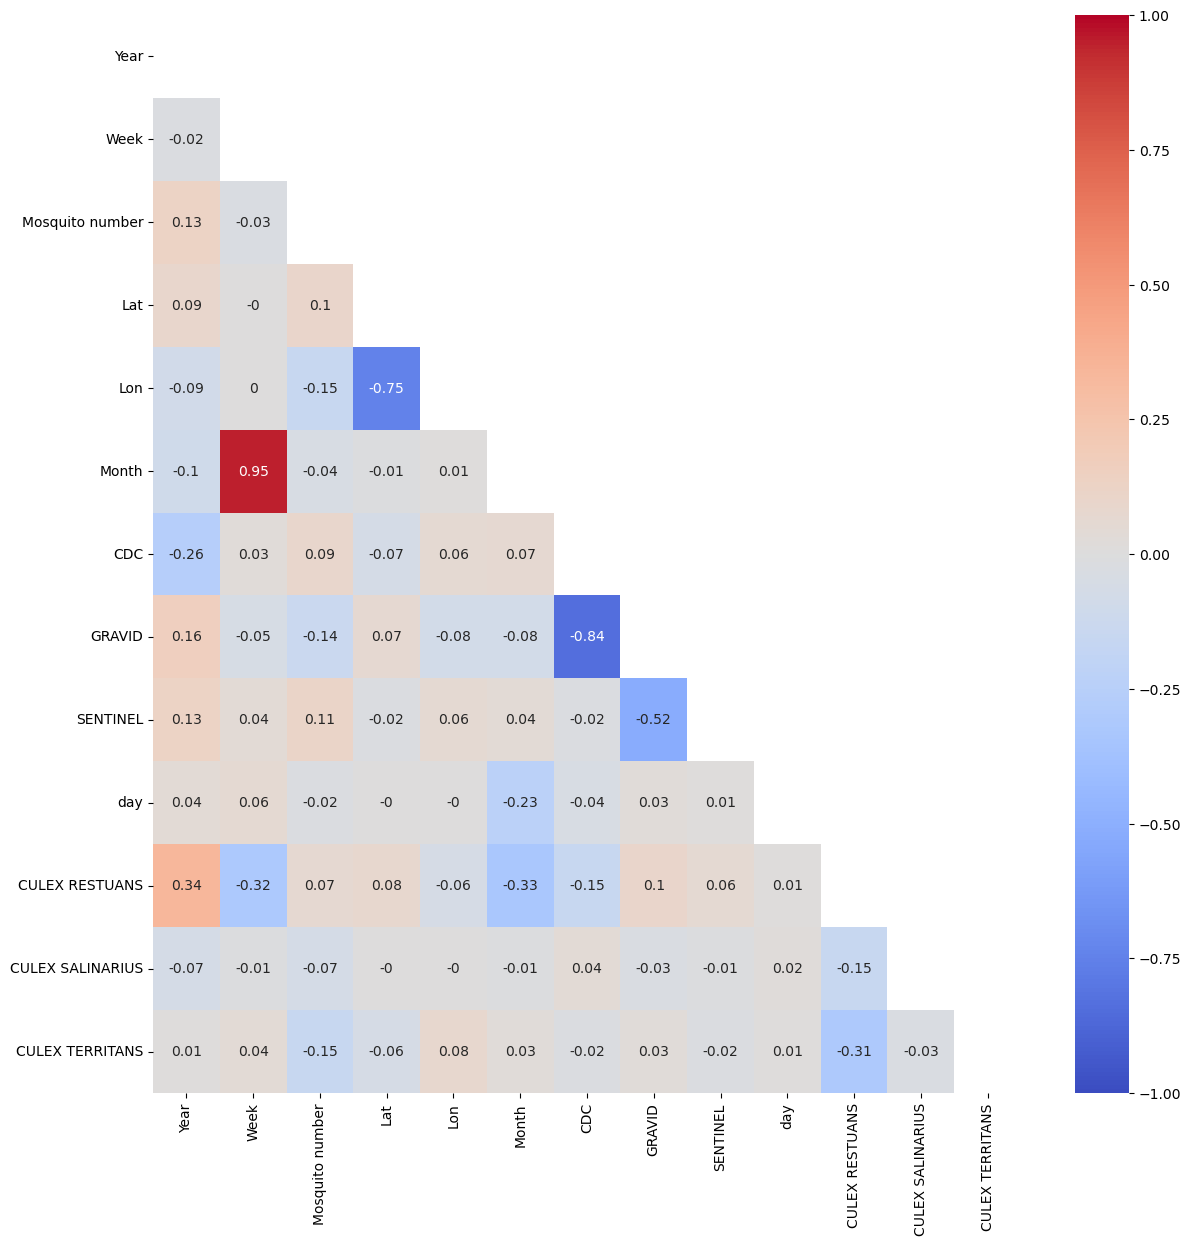

In [773]:
# Mask for upper-triangular
mask = np.triu(stat_df[numerical_columns].corr())

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(14,14))
sns.heatmap(stat_df[numerical_columns].corr().round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

#### Interpretetion

- We see a strong correlation between 'Month' and 'Week', since both of them are correlated similarly with the dependent variable, we've decided to keep the more detailed time divisions associated with the 'Week' variable and drop the 'Month' column.

- Additionally, there is a strong  negative correlation between 'Lat' and 'Lon.' In this case, 'Lat' has a weaker coefficient, so we've decided to remove it from the analysis.

- Furthermore, we can identify that the trap type 'GRAVID' column is strongly correlated with two other trap types. As a result, we've decided to drop the 'GRAVID' column as well.

In [774]:
# Dropping the columns which had high correlation. 
stat_df = df3.drop(columns = ['Month', 'Lat', 'GRAVID'])

In [775]:
# Sanity check
stat_df.head(2)

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Lon,WNV Present Binary,day,CDC,SENTINEL,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 0:09,2,negative,-87.880969,0,26,0,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 0:09,1,negative,-87.736925,0,26,0,0,1,0,0


---

#### Another Heatmap

After dropping the highly correlated columns, we will make another Heatmap to re-check the state of our variables. 

<Figure size 1400x1400 with 0 Axes>

<Axes: >

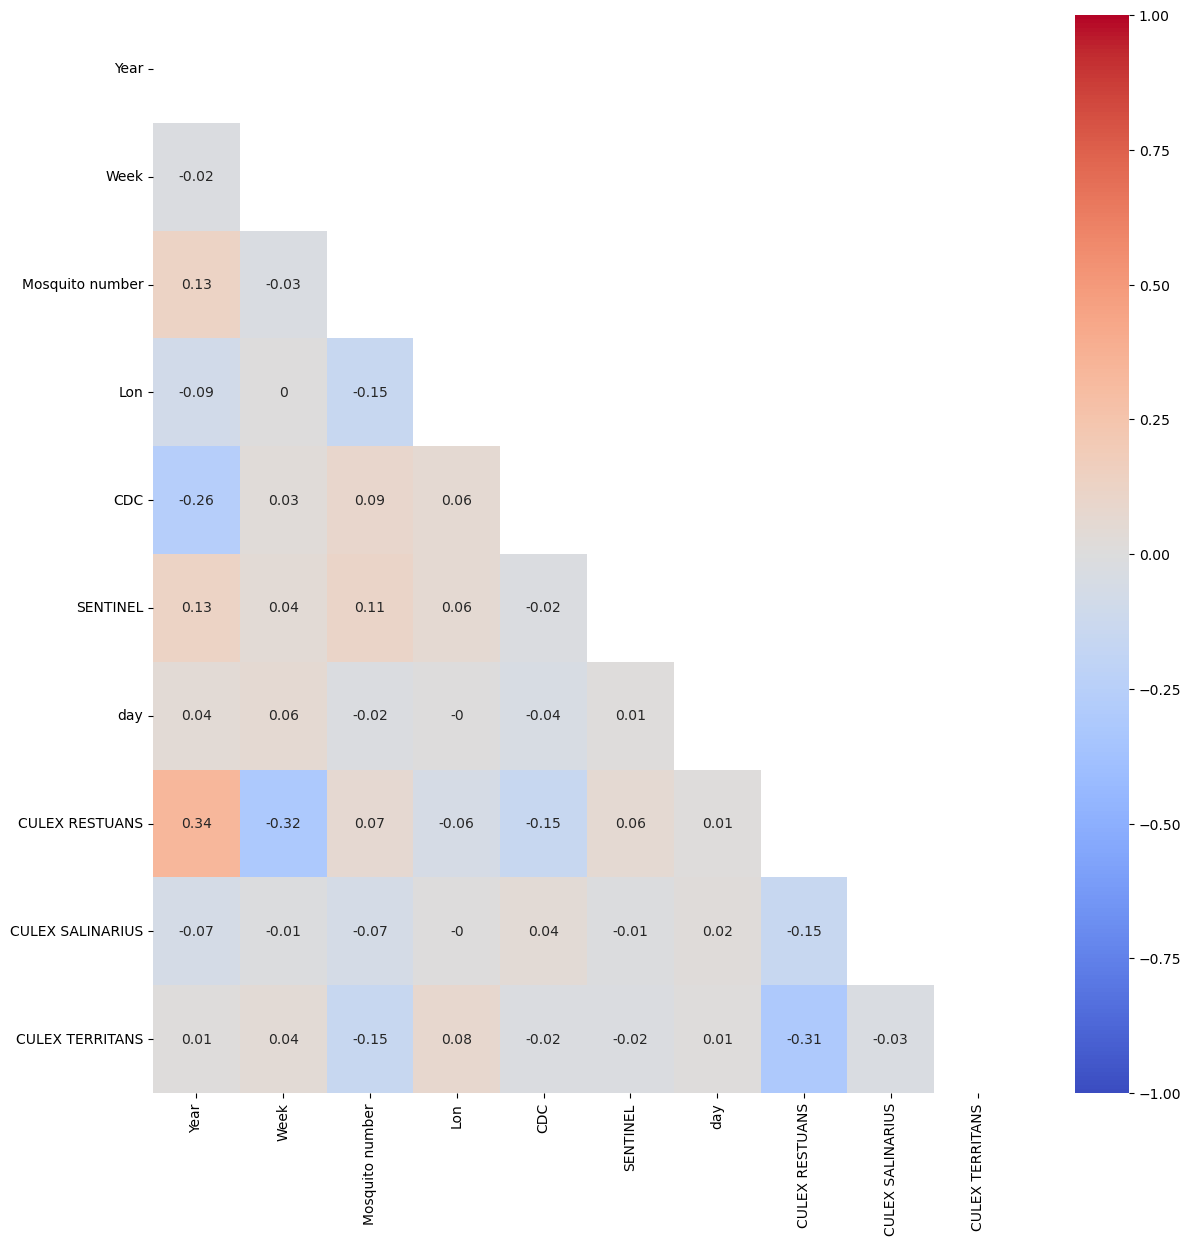

In [776]:
# Select numerical columns
numerical_columns = ['Year', 'Week', 'Mosquito number', 'Lon', 'CDC', 'SENTINEL', 'day', 'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TERRITANS']

# Mask for upper-triangular
mask = np.triu(stat_df[numerical_columns].corr())

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(14,14))
sns.heatmap(stat_df[numerical_columns].corr().round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

# Generate a heatmap of the correlation matrix
plt.show()

#### Finding

As we can see in above heatmap, all the features are independent (or very less correlation), so now we can move on to fit our model.

---

In [777]:
# We will take all the numerical variable columns for our model. 
numerical_columns = ['Year', 'Week', 'Lon', 'CDC', 'SENTINEL', 'day', 'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TERRITANS']

In [778]:
# Defining the independent variables (X) and our target/object/dependent variable (Y)
X = stat_df[numerical_columns]
y = stat_df['Mosquito number']

In [779]:
# Adding constant values
X_withConst = sm.add_constant(X)

In [780]:
# Instantiate the model
linear_model = sm.OLS(y, X_withConst)

# Fit the model
linear_model_result = linear_model.fit()

# Model summary
linear_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     207.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:46:28   Log-Likelihood:                -73454.
No. Observations:               18495   AIC:                         1.469e+05
Df Residuals:                   18485   BIC:                         1.470e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2835.4009    100.422    -28.235      0.000   -3032.238   -2638.564
Year                 0.5410      0.028     19.102      0.000       0.485       0.596
Week                -0.1471      0.023     -6.314      0.000      -0.193      -0.101
Lon                -20.1021      1.001    -20.086      0.000     -22.064     -18.140
CDC                 10.9656      0.582     18.846      0.000       9.825      12.106
SENTINEL            12.9223      0.905     14.283      0.000      11.149      14.696
day                 -0.0223      0.011     -2.038      0.042      -0.044      -0.001
CULEX RESTUANS      -1.2833      0.240     -5.357      0.000      -1.753      -0.814
CULEX SALINARIUS    -9.6955      0.874    -11.090      0.000     -11.409      -7.982
CULEX TERRITANS     -9.3065      0.465    -20.002      0.000     -10.218      -8.394
==============================================================================
Omnibus:                     4529.435   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8965.240
Skew:                           1.503   Prob(JB):                         0.00
Kurtosis:                       4.612   Cond. No.                     2.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Explanation

We are building a Linear Regression model. Following is an explanation of the steps we used: 
- **'numerical_columns':** First we start by making a list called 'numerical_columns' containing variables which will be used for our model. 
- **X = stat_df[numerical_columns]:** In this code, we define our independent variables, in our case, it is the list we made called 'numerical_columns'.
- **y = stat_df['Mosquito number']:** Then we define our dependent/target variable, in our case, it is the column named 'Mosquito number'.
- **X_withConst = sm.add_constant(X):** This code adds a constant (1) to our independent variables. Adding a constant (intercept) in linear regression accommodates a baseline prediction and allows the model to capture variations in the data unexplained by independent variables.
- **linear_model = sm.OLS(y, X_withConst):** Instantiates an Ordinary Least Squares (OLS) linear regression model using the dependent variable y and the independent variables in X_withConst.
- **linear_model_result = linear_model.fit():** Fits the linear regression model to the data, estimating coefficients and other model parameters.
- **linear_model_result.summary():** Displays a comprehensive summary of the linear regression model, including coefficient estimates, standard errors, t-values, p-values, R-squared, and more.

#### Finding 
<mark> An R-squared value of 0.092 indicates that this linear regression model poorly explains the variance in the dependent variable, with only 9.2% of the variance being accounted for by the independent variables.</mark>

---

#### Residuals 
- A residual plot can help to visualize whether the error in the model is random or non-random 
- The distribution of the residual values should appear to be normally distributed

<Figure size 640x480 with 0 Axes>

(array([   7.,   26.,   46.,   69.,  120.,  287.,  841., 1769., 2714.,
        2729., 2036., 1375., 1015.,  871.,  564.,  410.,  372.,  321.,
         275.,  278.,  246.,  214.,  224.,  168.,  180.,  148.,  136.,
         236.,  292.,  217.,  166.,   98.,   20.,   19.,    6.]),
 array([-26.27125873, -24.1577313 , -22.04420388, -19.93067646,
        -17.81714903, -15.70362161, -13.59009419, -11.47656676,
         -9.36303934,  -7.24951192,  -5.13598449,  -3.02245707,
         -0.90892965,   1.20459777,   3.3181252 ,   5.43165262,
          7.54518004,   9.65870747,  11.77223489,  13.88576231,
         15.99928974,  18.11281716,  20.22634458,  22.33987201,
         24.45339943,  26.56692685,  28.68045428,  30.7939817 ,
         32.90750912,  35.02103654,  37.13456397,  39.24809139,
         41.36161881,  43.47514624,  45.58867366,  47.70220108]),
 <BarContainer object of 35 artists>)

Text(0.5, 1.0, 'Distribution of residual values')

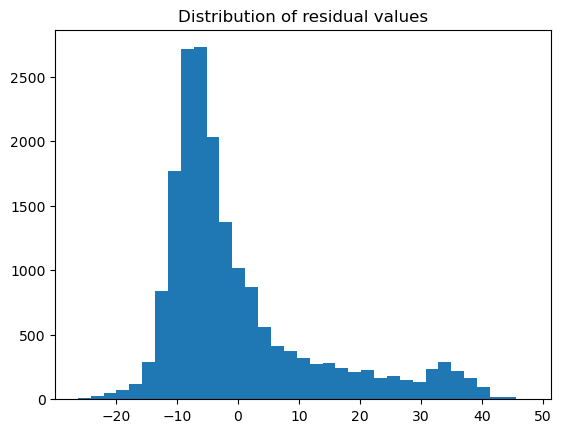

In [781]:
# Plotting the result. 
plt.figure()
plt.hist(linear_model_result.resid, bins = 35)
plt.title('Distribution of residual values')
plt.show()

#### Finding

This is a histogram that shows the residual distribution of the results for our linear model and visualize them in 35 bins. 

<Figure size 640x480 with 0 Axes>

((array([-3.95998751, -3.74286018, -3.62400796, ...,  3.62400796,
          3.74286018,  3.95998751]),
  array([-26.27125873, -25.53466372, -24.80386752, ...,  45.69687051,
          45.83513916,  47.70220108])),
 (11.679498785473946, -1.2188834085965093e-12, 0.9093745479662619))

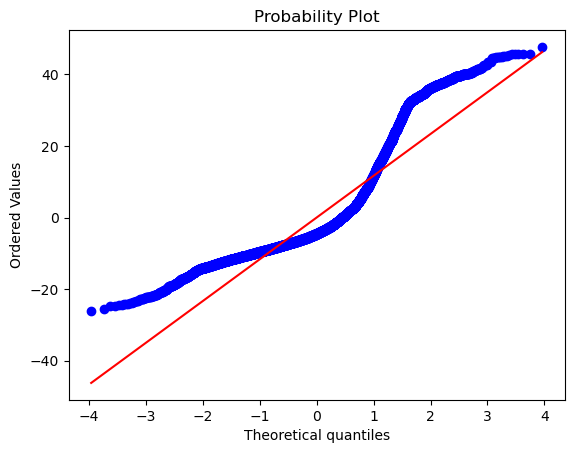

In [782]:
# QQ plot

plt.figure()
stats.probplot(linear_model_result.resid, dist="norm", plot=plt)
plt.show()

#### Finding

The QQ plot indicates that the residuals **do not follow a normal distribution because the points deviate from the expected linear pattern**. This implies that the linear regression model's assumptions, particularly the one about normally distributed error terms, are **not satisfied**.

---

#### Homoscedasticity

Homoscedasticity in linear regression means that the variance of residuals is consistent across all levels of predictor variables, ensuring the reliability of statistical inference. Violations, known as heteroscedasticity, can lead to biased parameter estimates and unreliable results.

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Fitted values')

Text(0, 0.5, 'Residuals')

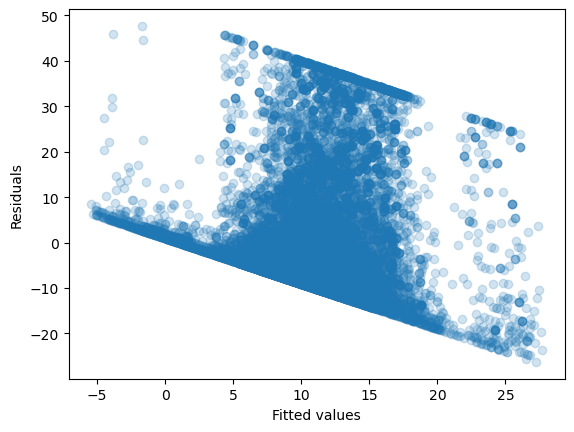

In [783]:
# Plotting the scatterplot.
plt.figure()
plt.scatter(linear_model_result.fittedvalues, linear_model_result.resid, alpha=0.2)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

#### Finding

In this graph, we can notice that the **variance in residuals appear to be dependent on the fitted values**. They are more spread out between ***10*** and ***15***. Therefore, the forth assumption failed proving that the residuals are **not homoscedastic** in nature.

---

### **Interpretation**

The linear regression model was constructed to determine how the independent variables ***'Year', 'Week', 'Lon', 'CDC', 'SENTINEL', 'day', 'CULEX RESTUANS', 'CULEX SALINARIUS' and 'CULEX TERRITANS'*** affect our target variable ***'Mosquito number'***. 'Month', 'Lat', 'GRAVID' were dropped from the model due to high multicollinearity with other variables.

**Here is the summary of the linear regression model:**

1. R-squared value: The R-squared value is 0.092, which means that only about 9.2% of the variance in the dependent variable ('Mosquito number') can be explained by the independent variables. This is quite low, suggesting that the model does not fit the data very well.

2. Coefficients and significance of independent variables:
    - **'Lon', 'Week', 'Day', 'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TERRITANS'** are statistically significant at the 5% level (their p-values are less than 0.05) and have negative coefficients. 
        - This indicates that as these variables increase, the number of mosquitoes caught decreases.
    - **'Year', 'CDC', 'Sentinel'** is statistically significant at the 5% level (its p-value is less than 0.05) and has a positive coefficient. 
        - This indicates that as this variable increases, the number of mosquitoes caught also increases.
4. Residuals and QQ plot: The QQ plot shows that the residuals are not normally distributed, as the points do not lie along the line. This suggests that the assumptions of the linear regression model are not met, specifically the assumption of normally distributed error terms.

#### **Limitations of the Model**

- The model explains only a small proportion (9.2%) of the variance in the number of mosquitoes caught, suggesting that there are other variables not included in the model that could better explain the number of mosquitoes caught.
- The model assumes a linear relationship between the independent variables and the dependent variable, which may not be the case in reality.
- The model assumes that the error terms are normally distributed, but the QQ plot suggests that this assumption is violated.
- The model does not account for potential interaction effects between the independent variables.

---

### 3.2)  Run a logistic regression to determine how the independent variables affect West Nile Virus presence. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations.

#### Because the Linear regression model was not very useful for our dataset, we will be taking a different approach and making a **Logistics Regression model.**

In [784]:
# Making a copy of the original Dataframe (df3).
stat_df2 = df3.copy()

In [785]:
# Sanity check
stat_df2.head(1)

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Lat,Lon,Month,WNV Present Binary,day,CDC,GRAVID,SENTINEL,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 0:09,2,negative,41.977738,-87.880969,9,0,26,0,1,0,1,0,0


In [786]:
# Select numerical columns
numerical_columns = ['Year', 'Week', 'Mosquito number', 'WNV Present Binary', 'Lon', 'CDC', 'SENTINEL', 'day', 'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TERRITANS']

<Figure size 1400x1400 with 0 Axes>

<Axes: >

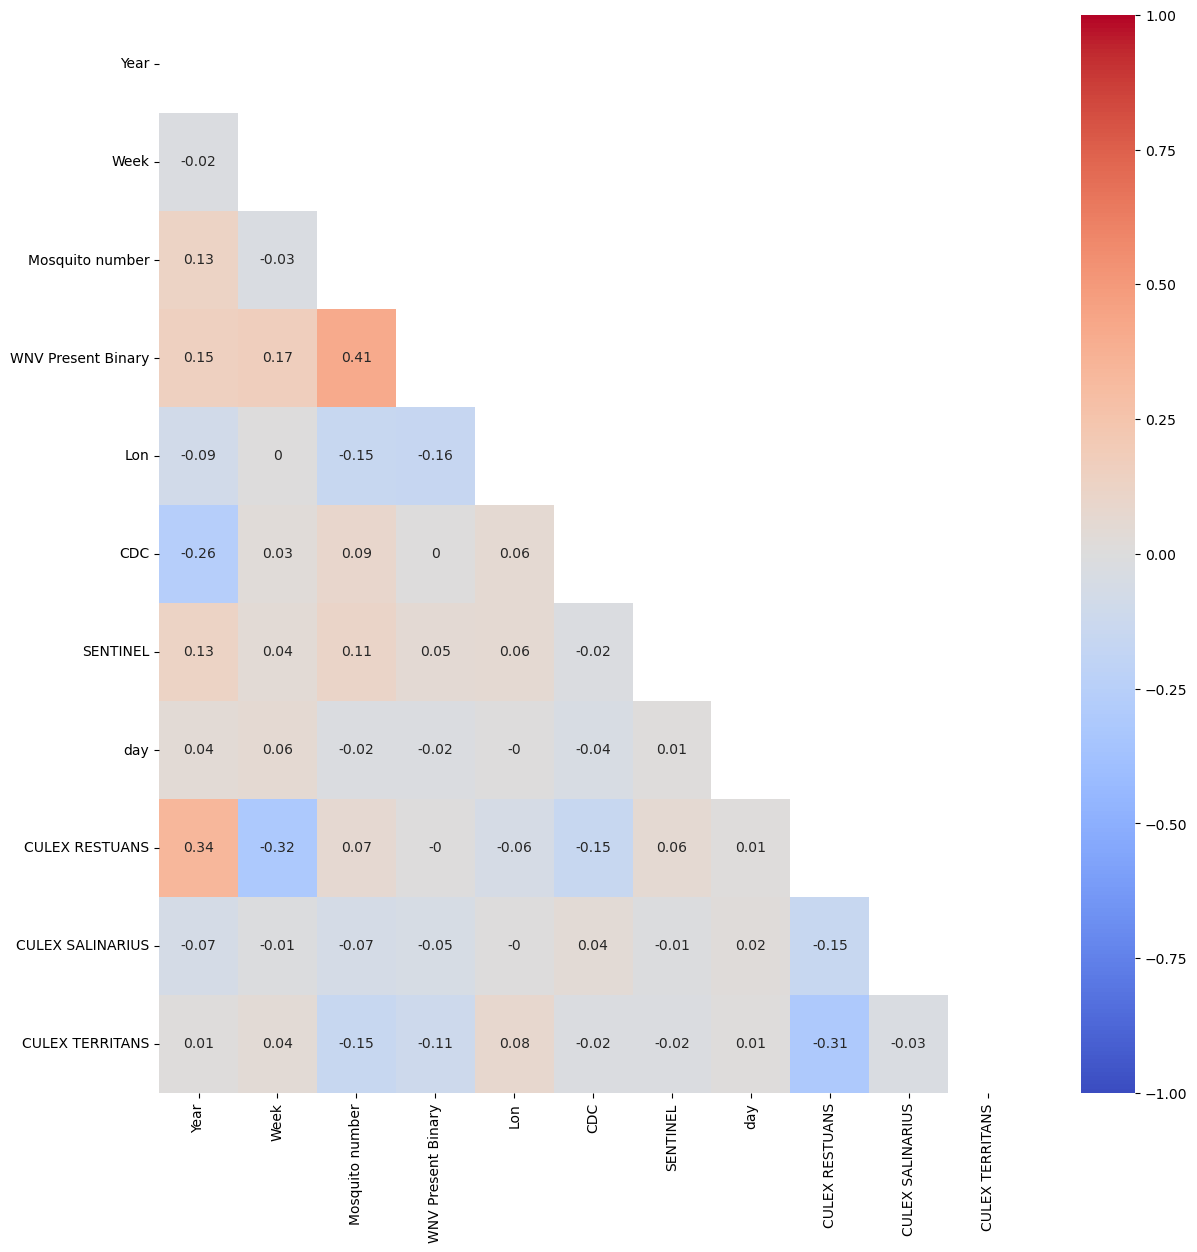

In [787]:
# Mask for upper-triangular
mask = np.triu(stat_df2[numerical_columns].corr())

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(14,14))
sns.heatmap(stat_df2[numerical_columns].corr().round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

#### Finding

As we can see in above heatmap, all the features are independent (or very less correlation), so now we can move on to fit our model.

---

In [788]:
# Choosing the numerical columns which we will be using as our Independent variables. 
numerical_columns1 = ['Year', 'Week', 'Mosquito number', 'Lon', 'CDC', 'SENTINEL', 'day', 'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TERRITANS']

In [789]:
# Defining the independent variables (X) and our target/object/dependent variable (Y)
X = stat_df[numerical_columns1]
y = stat_df['WNV Present Binary']

X.head(2)
y

,Year,Week,Mosquito number,Lon,CDC,SENTINEL,day,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,2,-87.880969,0,0,26,1,0,0
1,2019,39,1,-87.736925,0,0,26,1,0,0


0        0
1        0
2        0
3        0
4        0
        ..
18490    1
18491    1
18492    1
18493    1
18494    1
Name: WNV Present Binary, Length: 18495, dtype: int64

In [790]:
# Add constant to our X 
X_const = sm.add_constant(X)

# Check it out 
X_const

,const,Year,Week,Mosquito number,Lon,CDC,SENTINEL,day,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,1.0,2019,39,2,-87.880969,0,0,26,1,0,0
1,1.0,2019,39,1,-87.736925,0,0,26,1,0,0
2,1.0,2019,39,2,-87.689417,0,0,26,1,0,0
3,1.0,2019,39,1,-87.724987,0,0,26,1,0,0
4,1.0,2019,39,9,-87.546049,0,0,26,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18490,1.0,2016,36,4,-87.635858,0,0,9,0,0,0
18491,1.0,2007,34,19,-87.758403,0,0,24,0,0,0
18492,1.0,2016,30,34,-87.590176,0,0,27,1,0,0
18493,1.0,2017,33,50,-87.664758,0,1,17,1,0,0


In [791]:
# Instantiate the logistic regression model 
logreg = sm.Logit(y, X_const)

# Fit the model (this returns a separate object with the parameters)
logreg_results = logreg.fit()

# Display the results 
logreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.405567
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     WNV Present Binary   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18484
Method:                           MLE   Df Model:                           10
Date:                Mon, 09 Oct 2023   Pseudo R-squ.:                  0.2227
Time:                        21:46:30   Log-Likelihood:                -7501.0
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -486.6185     22.744    -21.396      0.000    -531.195    -442.042
Year                 0.1096      0.007     16.210      0.000       0.096       0.123
Week                 0.1492      0.006     26.315      0.000       0.138       0.160
Mosquito number      0.0650      0.001     44.652      0.000       0.062       0.068
Lon                 -2.9572      0.214    -13.799      0.000      -3.377      -2.537
CDC                 -0.1223      0.131     -0.935      0.350      -0.379       0.134
SENTINEL            -0.4008      0.171     -2.350      0.019      -0.735      -0.066
day                 -0.0079      0.002     -3.306      0.001      -0.013      -0.003
CULEX RESTUANS      -0.2493      0.051     -4.858      0.000      -0.350      -0.149
CULEX SALINARIUS    -0.9860      0.322     -3.061      0.002      -1.617      -0.355
CULEX TERRITANS     -2.4900      0.274     -9.073      0.000      -3.028      -1.952
====================================================================================
"""

We observe that the **'CDC' has a p-value well above the 0.05 threshold**. Given a null hypothesis ($H_0$) that indpendent variables do not impact the presence of WNC, we **fail to reject** for this column. Further analysis can be carried out separately but this may be a candidate for removal.

---

In [792]:
# Drop the 'CDC' trap type from the Dataframe (with constants)
X_const.drop(columns = 'CDC', inplace = True)

In [793]:
# Refit the model
logreg_model_2 = sm.Logit(y, X_const)
logreg_model_2_results = logreg_model_2.fit()
logreg_model_2_results.summary()

Optimization terminated successfully.
         Current function value: 0.405591
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     WNV Present Binary   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18485
Method:                           MLE   Df Model:                            9
Date:                Mon, 09 Oct 2023   Pseudo R-squ.:                  0.2226
Time:                        21:46:31   Log-Likelihood:                -7501.4
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -491.7539     22.087    -22.264      0.000    -535.044    -448.464
Year                 0.1112      0.007     16.988      0.000       0.098       0.124
Week                 0.1491      0.006     26.306      0.000       0.138       0.160
Mosquito number      0.0648      0.001     45.270      0.000       0.062       0.068
Lon                 -2.9789      0.213    -13.984      0.000      -3.396      -2.561
SENTINEL            -0.3989      0.170     -2.341      0.019      -0.733      -0.065
day                 -0.0079      0.002     -3.291      0.001      -0.013      -0.003
CULEX RESTUANS      -0.2461      0.051     -4.806      0.000      -0.347      -0.146
CULEX SALINARIUS    -0.9894      0.322     -3.072      0.002      -1.621      -0.358
CULEX TERRITANS     -2.4884      0.274     -9.067      0.000      -3.026      -1.951
====================================================================================
"""

#### Finding

As we can see, by removing the **'CDC'** column, all the p-values are considerably **less than the threshold of 0.05**. This indicates that we can **reject the Null hypothesis ($H_0$)** and say that indpendent variables might have some impact on the presence of WNC ($H_1$). 

#### Evaluation

We will now evaluate how well our model performed by looking at the accuracy of its predictions. 

In [794]:
# Getting the model predictions as probabilities and saving to 'y_proba'
y_proba = logreg_model_2_results.predict(X_const)

# Print 
y_proba

0        0.509434
1        0.387910
2        0.369846
3        0.379501
4        0.375968
           ...   
18490    0.276138
18491    0.260285
18492    0.391831
18493    0.742084
18494    0.269878
Length: 18495, dtype: float64

In [795]:
# Going from soft predictions (probabilities) to hard predictions (1 or 0)

# We will set our threshold to 0.5 
y_pred = np.where(y_proba >= 0.5, 1, 0)

# Look at the model's predictions
y_pred

array([1, 0, 0, ..., 0, 1, 0])

#### Finding

This gives us an a list of **1's** and **0's**, assigning 1 to those predictions which are more than equal to 0.5 and 0 to the ones that are not. 

---

Now that we have our model predictions, we can determine the accuracy of the model's performance.

In [796]:
# Calculating accuracy
acc = (y_pred == y).sum()/stat_df2.shape[0]

# Print the accuracy score
print(f'Model accuracy = {acc}')

Model accuracy = 0.8118951067856177


So our model have an accuracy score of **81.18%** which is not bad given we only used 9 variables.

In [797]:
# Getting the regression coefficients from the params attribute of the fitted model object
logreg_model_2_results.params

const              -491.753924
Year                  0.111199
Week                  0.149076
Mosquito number       0.064751
Lon                  -2.978901
SENTINEL             -0.398943
day                  -0.007878
CULEX RESTUANS       -0.246126
CULEX SALINARIUS     -0.989419
CULEX TERRITANS      -2.488405
dtype: float64

#### Interpretetion

The code retrieves and displays the regression coefficients from the params attribute of a fitted logistic regression model, providing the estimated coefficients for each predictor variable.

In the resulting coefficients, each value represents the change in the log-odds of the binary outcome variable associated with a one-unit change in the corresponding predictor variable while holding other variables constant. For example: 
- **Year:** It has a positive coefficient, so this means with an ***increase of one unit*** in this variable, the chances of WNC presence ***increase by a factor of 0.1118***. 
- **Lon:** It has a negative correlation coefficient, so with an ***increase of one unit*** in this variable, the chances of WNC presence ***decreases by a factor of 2.98***. 

And so on...

In [798]:
# Lets put this in a dataframe
results_df = pd.DataFrame(logreg_model_2_results.params, columns=['Coefficient'])

# Display the dataframe
results_df

,Coefficient
const,-491.753924
Year,0.111199
Week,0.149076
Mosquito number,0.064751
Lon,-2.978901
SENTINEL,-0.398943
day,-0.007878
CULEX RESTUANS,-0.246126
CULEX SALINARIUS,-0.989419
CULEX TERRITANS,-2.488405


In [799]:
# Calculate and add the odds ratios to results_df
# Log odds is more interpretable
results_df['odds_ratio'] = np.exp(results_df['Coefficient'])

# Display the dataframe
results_df

,Coefficient,odds_ratio
const,-491.753924,2.716342e-214
Year,0.111199,1.117617e+00
Week,0.149076,1.160761e+00
Mosquito number,0.064751,1.066894e+00
Lon,-2.978901,5.084867e-02
SENTINEL,-0.398943,6.710290e-01
day,-0.007878,9.921534e-01
CULEX RESTUANS,-0.246126,7.818236e-01
CULEX SALINARIUS,-0.989419,3.717926e-01
CULEX TERRITANS,-2.488405,8.304231e-02


### Interpretation:

The logistic regression model was constructed to determine how the **independent variables:** ***'Year', 'Week', 'Mosquito number', 'Lon', 'CDC', 'SENTINEL', 'day', 'CULEX RESTUANS', 'CULEX SALINARIUS' and 'CULEX TERRITANS'*** affect the **target variable:** ***'WNV Present Binary'.***

##### **Here is the summary of the logistic regression model:**

- **Model Accuracy:** The logistic regression model achieved an accuracy of approximately 81.19%, which means it correctly predicted the presence or absence of WNV in 81.19% of cases.
- **Model Coefficients:** The coefficients of the model provide insights into the influence of each predictor variable on the probability of WNV presence:

    - The ***'Year'*** and ***'Week'*** variables have **positive** coefficients, suggesting that an increase in these variables is associated with an increased likelihood of WNV presence.
    - ***'Mosquito number'*** also has a **positive** coefficient, indicating that a higher mosquito count is associated with a higher probability of WNV presence.
    - In contrast ***'Lon', 'SENTINEL', 'day', 'CULEX RESTUANS', 'CULEX SALINARIUS', and 'CULEX TERRITANS'*** have **negative** coefficients, suggesting a decreased likelihood of WNV presence as these variables increase.

- **Odds Ratios:** The odds ratios indicate the change in odds for a one-unit change in each predictor variable. An odds ratio greater than 1 implies an increase in odds, while an odds ratio less than 1 implies a decrease in odds. For example, an increase in Year by one unit results in an odds increase of approximately 1.118 times.